<a href="https://colab.research.google.com/github/rodrigoyujisato/statistics/blob/main/factor_analysis_varimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/introduction-factor-analysis

In [88]:
!pip install factor_analyzer
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
data = pd.read_csv("clean.csv", delimiter= ';', decimal=",")
data = data.astype(float)
data.drop(['ID','A','B','C','D','E','F','G','H','I','J','K'],axis=1,inplace=True)
data

,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
0,4.0,3.0,3.0,2.0,5.0,2.0,3.0,2.0,2.0,5.0,3.0,3.0,3.0,3.0
1,5.0,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0
2,4.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0
3,5.0,5.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,5.0,5.0,4.0,5.0,2.0,5.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0
124,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0
125,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,5.0,1.0,3.0
126,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,2.0,3.0


In [90]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(447.058360659338, 2.0592082841633175e-48)

In [91]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.5776924257902982

In [92]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values
vectors

array([ 2.33113943,  1.754699  ,  0.90830824,  0.44356969,  0.35792351,
        0.31678789,  0.17728043,  0.10364604, -0.07322984, -0.14986938,
       -0.17101791, -0.22829919, -0.37593997, -0.40085238])

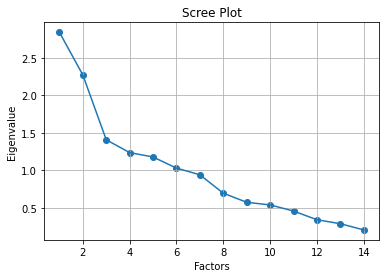

In [93]:
plt.scatter(range(1,data.shape[1]+1),eigen_values)
plt.plot(range(1,data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [94]:
fa = FactorAnalyzer(bounds=(0.005, 1), impute='drop', is_corr_matrix=False,
        method='minres', n_factors=3, rotation='varimax',use_smc=True)
fa.fit(data)
lo = fa.loadings_
co = fa.corr_
rm = fa.rotation_matrix_

In [95]:
lo

array([[ 0.032006  ,  0.15615408, -0.00230642],
       [ 0.04581453,  0.14085574,  0.08626857],
       [ 0.01095691,  0.35376556,  0.13259311],
       [-0.07451943,  0.35209052,  0.31219619],
       [-0.12380524,  0.30715405,  0.28615935],
       [-0.10864879,  0.79682066,  0.07291867],
       [-0.02754292,  0.65660782,  0.12657476],
       [-0.00103532,  0.28226924,  0.59631415],
       [ 0.02179674,  0.15009192,  0.85580845],
       [ 0.3732556 , -0.11895491,  0.14242502],
       [ 0.51937206, -0.0118271 ,  0.16815453],
       [ 0.53691153,  0.00200559, -0.03093465],
       [ 0.7756686 ,  0.18959337, -0.35014586],
       [ 0.69180116,  0.08480093, -0.28314982]])

In [96]:
co

array([[ 1.00000000e+00,  1.39776136e-01,  3.46519662e-02,
         1.43457863e-01,  4.02165372e-02,  2.18373716e-01,
        -3.23779623e-02,  6.27661963e-02, -4.48528569e-02,
         8.90304317e-02, -8.89845048e-02,  1.88764640e-01,
        -3.17930321e-02,  4.06330129e-02],
       [ 1.39776136e-01,  1.00000000e+00,  2.92054247e-01,
         3.89517405e-02,  1.02734766e-01,  7.91025295e-02,
         3.84073182e-02,  3.71754572e-02,  6.78288451e-02,
        -1.19691450e-03,  1.27159341e-01,  2.07496690e-02,
        -2.89862924e-02,  1.56476757e-02],
       [ 3.46519662e-02,  2.92054247e-01,  1.00000000e+00,
         3.36472014e-01,  4.98600741e-02,  1.92294985e-01,
         3.08845639e-01,  6.62804732e-02,  1.87637983e-01,
        -4.13299193e-02,  9.65024413e-02, -1.29651308e-01,
         5.86144619e-02,  2.13424731e-04],
       [ 1.43457863e-01,  3.89517405e-02,  3.36472014e-01,
         1.00000000e+00,  1.23523080e-01,  3.10782079e-01,
         1.89618140e-01,  3.14123933e-01,  3.

In [97]:
arr = np.asarray(lo)
np.savetxt('clean_result.csv',arr, delimiter=";", fmt='%1.4f')   
arr

array([[ 0.032006  ,  0.15615408, -0.00230642],
       [ 0.04581453,  0.14085574,  0.08626857],
       [ 0.01095691,  0.35376556,  0.13259311],
       [-0.07451943,  0.35209052,  0.31219619],
       [-0.12380524,  0.30715405,  0.28615935],
       [-0.10864879,  0.79682066,  0.07291867],
       [-0.02754292,  0.65660782,  0.12657476],
       [-0.00103532,  0.28226924,  0.59631415],
       [ 0.02179674,  0.15009192,  0.85580845],
       [ 0.3732556 , -0.11895491,  0.14242502],
       [ 0.51937206, -0.0118271 ,  0.16815453],
       [ 0.53691153,  0.00200559, -0.03093465],
       [ 0.7756686 ,  0.18959337, -0.35014586],
       [ 0.69180116,  0.08480093, -0.28314982]])

In [98]:
fa.get_factor_variance()

(array([1.81475533, 1.61337738, 1.56601287]),
 array([0.12962538, 0.11524124, 0.11185806]),
 array([0.12962538, 0.24486662, 0.35672468]))